In [1]:
#!rm -r build
!python3 setup.py build_ext --inplace

Compiling nice/unrolling_individual_pca.pyx because it changed.
[1/1] Cythonizing nice/unrolling_individual_pca.pyx
/home/pozdn/.local/lib/python3.6/site-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /home/pozdn/nice/nice/unrolling_individual_pca.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
running build_ext
building 'nice.unrolling_individual_pca' extension
x86_64-linux-gnu-gcc -pthread -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/include/python3.6m -c nice/unrolling_individual_pca.c -o build/temp.linux-x86_64-3.6/nice/unrolling_individual_pca.o -O3 -fopenmp
x86_64-linux-gnu-gcc -pthread -shared -Wl,-O1 -Wl,-Bsymbolic-functions -Wl,-Bsymbolic-functions -Wl,-z,relro -Wl,-Bsymbolic-functions -Wl,-z,relro -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-t

In [2]:
'''import sys
sys.path.insert(0, 'nice')
'''
#os.environ['OMP_NUM_THREADS'] = '24'

import numpy as np
import ase.io as ase_io
from ase import Atoms
import tqdm
import time
import copy
from sklearn.linear_model import BayesianRidge
from pathos.multiprocessing import ProcessingPool as Pool
import nice
from nice.transformers import *
from nice.parallelized import *

from matplotlib import pyplot as plt


In [3]:
def process_structures(structures):
    for structure in structures: 
        structure.cell =[120, 120, 120]
        structure.positions += np.asarray((60,60,60))
        structure.pbc=True
        structure.wrap()

In [4]:
structures_train = ase_io.read('structures.xyz', 
                         index = '0:100')

process_structures(structures_train)

'''structures_val = ase_io.read('structures.xyz', 
                         index = '100:200')'''

#process_structures(structures_val)


"structures_val = ase_io.read('structures.xyz', \n                         index = '100:200')"

In [5]:
energies = np.load('energies.npy')
energies = energies - np.mean(energies)
energies = energies / np.sqrt(np.mean(energies * energies))
energies_train = energies[0:1000]
energies_val = energies[1000:2000]
print(energies_train.shape)
print(energies_val.shape)

(1000,)
(1000,)


In [6]:
HYPERS = {
'interaction_cutoff': 6.3,
'max_radial': 5,
'max_angular': 5,
'gaussian_sigma_type': 'Constant',
'gaussian_sigma_constant': 0.05,
'cutoff_smooth_width': 0.3,
'radial_basis': 'GTO',
}
    

In [7]:
p = Pool(40)

Process ForkPoolWorker-27:
Process ForkPoolWorker-6:
Process ForkPoolWorker-18:
Process ForkPoolWorker-40:
Process ForkPoolWorker-20:
Process ForkPoolWorker-36:
Process ForkPoolWorker-13:
Process ForkPoolWorker-12:
Process ForkPoolWorker-30:
Process ForkPoolWorker-38:
Process ForkPoolWorker-23:
Process ForkPoolWorker-26:
Process ForkPoolWorker-14:
Process ForkPoolWorker-21:
Process ForkPoolWorker-1:
Process ForkPoolWorker-32:
Process ForkPoolWorker-11:
Process ForkPoolWorker-4:
Process ForkPoolWorker-15:
Process ForkPoolWorker-34:
Process ForkPoolWorker-5:
Process ForkPoolWorker-33:
Process ForkPoolWorker-19:
Process ForkPoolWorker-28:
Process ForkPoolWorker-24:
Process ForkPoolWorker-35:
Process ForkPoolWorker-31:
Process ForkPoolWorker-37:
Process ForkPoolWorker-29:
Process ForkPoolWorker-9:
Process ForkPoolWorker-16:
Process ForkPoolWorker-39:
Process ForkPoolWorker-8:
Process ForkPoolWorker-7:
Process ForkPoolWorker-10:
Process ForkPoolWorker-25:
Process ForkPoolWorker-2:
Process F

  File "/home/pozdn/.local/lib/python3.6/site-packages/multiprocess/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/pozdn/.local/lib/python3.6/site-packages/multiprocess/process.py", line 258, in _bootstrap
    self.run()
  File "/home/pozdn/.local/lib/python3.6/site-packages/multiprocess/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/pozdn/.local/lib/python3.6/site-packages/multiprocess/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/pozdn/.local/lib/python3.6/site-packages/multiprocess/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/pozdn/.local/lib/python3.6/site-packages/multiprocess/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/pozdn/.local/lib/python3.6/site-packages/multiprocess/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/pozdn/.l

  File "/home/pozdn/.local/lib/python3.6/site-packages/multiprocess/pool.py", line 108, in worker
    task = get()
  File "/home/pozdn/.local/lib/python3.6/site-packages/multiprocess/pool.py", line 108, in worker
    task = get()
  File "/home/pozdn/.local/lib/python3.6/site-packages/multiprocess/queues.py", line 337, in get
    with self._rlock:
  File "/home/pozdn/.local/lib/python3.6/site-packages/multiprocess/pool.py", line 108, in worker
    task = get()
  File "/home/pozdn/.local/lib/python3.6/site-packages/multiprocess/queues.py", line 337, in get
    with self._rlock:
  File "/home/pozdn/.local/lib/python3.6/site-packages/multiprocess/queues.py", line 337, in get
    with self._rlock:
  File "/home/pozdn/.local/lib/python3.6/site-packages/multiprocess/pool.py", line 108, in worker
    task = get()
  File "/home/pozdn/.local/lib/python3.6/site-packages/multiprocess/pool.py", line 108, in worker
    task = get()
  File "/home/pozdn/.local/lib/python3.6/site-packages/multiprocess/

  File "/home/pozdn/.local/lib/python3.6/site-packages/multiprocess/synchronize.py", line 101, in __enter__
    return self._semlock.__enter__()
  File "/home/pozdn/.local/lib/python3.6/site-packages/multiprocess/synchronize.py", line 101, in __enter__
    return self._semlock.__enter__()
  File "/home/pozdn/.local/lib/python3.6/site-packages/multiprocess/synchronize.py", line 101, in __enter__
    return self._semlock.__enter__()
  File "/home/pozdn/.local/lib/python3.6/site-packages/multiprocess/synchronize.py", line 101, in __enter__
    return self._semlock.__enter__()
  File "/home/pozdn/.local/lib/python3.6/site-packages/multiprocess/synchronize.py", line 101, in __enter__
    return self._semlock.__enter__()
  File "/home/pozdn/.local/lib/python3.6/site-packages/multiprocess/synchronize.py", line 101, in __enter__
    return self._semlock.__enter__()
  File "/home/pozdn/.local/lib/python3.6/site-packages/multiprocess/synchronize.py", line 101, in __enter__
    return self._semlo

In [8]:
print(len(structures_train))

100


In [9]:
coefficients = get_rascal_coefficients_parallelized(p, structures_train, HYPERS, 2)
print(coefficients.shape)
coefficients = coefficients.reshape([len(structures_train), 5, coefficients.shape[1], 
                                     coefficients.shape[2], coefficients.shape[3]])

print(coefficients.shape)

100%|██████████| 1/1 [00:00<00:00,  7.21it/s]

(500, 10, 6, 11)
(100, 5, 10, 6, 11)


In [10]:
'''def concatenate_data(datas):
    covariants = [datas[i].covariants_ for i in range(len(datas))]
    covariants = np.concatenate(covariants, axis = 0)
    return Data(covariants, datas[0].actual_sizes_, datas[0].importances_, datas[0].raw_importances_)

def transform_parallelized(transformer, *args, task_size = 100):
    print(len(args))
    tasks = []
    for i in range(0, args[0].shape[0], task_size):
        now = []
        for j in range(len(args)):
            now.append(args[j][i : i + task_size])
        tasks.append(now)
    
    def func(task):
        return transformer.transform(*task)
    
    result = [res for res in tqdm.tqdm(p.imap(func, tasks), total = len(tasks))]
    ans = []
    for i in range(len(result[0])):
        now = [result[j][i] for j in range(len(result))]
        ans.append(concatenate_data(now))
        
     print(len(ans))
    print(ans[0].shape)
    return ans'''

'def concatenate_data(datas):\n    covariants = [datas[i].covariants_ for i in range(len(datas))]\n    covariants = np.concatenate(covariants, axis = 0)\n    return Data(covariants, datas[0].actual_sizes_, datas[0].importances_, datas[0].raw_importances_)\n\ndef transform_parallelized(transformer, *args, task_size = 100):\n    print(len(args))\n    tasks = []\n    for i in range(0, args[0].shape[0], task_size):\n        now = []\n        for j in range(len(args)):\n            now.append(args[j][i : i + task_size])\n        tasks.append(now)\n    \n    def func(task):\n        return transformer.transform(*task)\n    \n    result = [res for res in tqdm.tqdm(p.imap(func, tasks), total = len(tasks))]\n    ans = []\n    for i in range(len(result[0])):\n        now = [result[j][i] for j in range(len(result))]\n        ans.append(concatenate_data(now))\n        \n     print(len(ans))\n    print(ans[0].shape)\n    return ans'

In [11]:
def split_coefficients(coefficients):
    c_coefficients = coefficients[:, 0]
    h_coefficients = coefficients[:, 1:]
   
    h_coefficients = np.reshape(h_coefficients, [coefficients.shape[0] * 4, 
                                              coefficients.shape[2], coefficients.shape[3],
                                              coefficients.shape[4]])
    return c_coefficients, h_coefficients

In [12]:
c_coefficients, h_coefficients = split_coefficients(coefficients)
print(c_coefficients.shape)

(100, 10, 6, 11)


In [13]:
'''begin = time.time()
pst = BSTransformer()
pst.fit(c_coefficients)
print(time.time() - begin)'''

'begin = time.time()\npst = BSTransformer()\npst.fit(c_coefficients)\nprint(time.time() - begin)'

In [14]:
'''begin = time.time()
res = pst.transform(c_coefficients)
print(res[2].shape)
print(time.time() - begin)'''

'begin = time.time()\nres = pst.transform(c_coefficients)\nprint(res[2].shape)\nprint(time.time() - begin)'

In [69]:
def fit(coefficients, num_to_fit):
    c_coefficients, h_coefficients = split_coefficients(coefficients)
    print(c_coefficients.shape)
    begin = time.time()
    c_trans = StandardSequence([StandardBlock(ThresholdExpansioner(),
                                              None,
                                                  IndividualLambdaPCAsBoth(20),
                                                  None,
                                              None,
                                                  None),
                                StandardBlock(ThresholdExpansioner(num_expand = 50),
                                              None,
                                                  IndividualLambdaPCAsBoth(20),
                                                  ThresholdExpansioner(num_expand = 50, mode = 'invariants'),
                                              None,
                                                  None),
                                StandardBlock(ThresholdExpansioner(num_expand = 50),
                                              None,
                                                  IndividualLambdaPCAsBoth(20),
                                                  ThresholdExpansioner(num_expand = 50, mode = 'invariants'),
                                              None,
                                                  None),
                                StandardBlock(ThresholdExpansioner(num_expand = 50),
                                              None,
                                                  IndividualLambdaPCAsBoth(20),
                                                  ThresholdExpansioner(num_expand = 50, mode = 'invariants'),
                                              None,
                                                  None)
                                   ])
                                  

    c_trans.fit(c_coefficients[:num_to_fit])
    print(time.time() - begin)
    
    begin = time.time()
    print(h_coefficients[:num_to_fit].shape)
    h_trans = StandardSequence([StandardBlock(ThresholdExpansioner(),
                                              None,
                                                  IndividualLambdaPCAsBoth(20),
                                                  None,
                                              None,
                                                  None),
                                StandardBlock(ThresholdExpansioner(num_expand = 50),
                                              None,
                                                  IndividualLambdaPCAsBoth(20),
                                                  ThresholdExpansioner(num_expand = 50, mode = 'invariants'),
                                              None,
                                                  None),
                                StandardBlock(ThresholdExpansioner(num_expand = 50),
                                              None,
                                                  IndividualLambdaPCAsBoth(20),
                                                  ThresholdExpansioner(num_expand = 50, mode = 'invariants'),
                                              None,
                                                  None),
                                StandardBlock(ThresholdExpansioner(num_expand = 50),
                                              None,
                                                  IndividualLambdaPCAsBoth(20),
                                                  ThresholdExpansioner(num_expand = 50, mode = 'invariants'),
                                              None,
                                                  None)
                                   ])
    h_trans.fit(h_coefficients[:num_to_fit])
    print(time.time() - begin)
    
    return c_trans, h_trans



In [70]:
c_trans, h_trans = fit(coefficients, 500)

(100, 10, 6, 11)


/home/pozdn/nice/nice/transformers.py:132: RuntimeWarning: given data is less than desired number of points to fit pca. Desired number of points to fit pca is 200, while number of vectors is 100, dimensionality of single vector (lambd + 1) is 1, i. e. total number of points is 100. Number of pca components is 20
  warnings.warn("given data is less than desired number of points to fit pca. Desired number of points to fit pca is {}, while number of vectors is {}, dimensionality of single vector (lambd + 1) is {}, i. e. total number of points is {}. Number of pca components is {}".format(num_fit_now, data.covariants_.shape[0], (lambd + 1), data.covariants_.shape[0] * (lambd + 1), n_components_now), RuntimeWarning)
/home/pozdn/nice/nice/transformers.py:132: RuntimeWarning: given data is less than desired number of points to fit pca. Desired number of points to fit pca is 200, while number of vectors is 100, dimensionality of single vector (lambd + 1) is 1, i. e. total number of points is 1

66.71182465553284
(400, 10, 6, 11)
43.61148285865784


In [73]:
c_coefficients, h_coefficients = split_coefficients(coefficients)


In [74]:

data_even, data_odd, invariants_even = c_trans.transform(c_coefficients[0:10])

In [76]:
print(data_even.covariants_.shape)
print(data_even.actual_sizes_)
print(data_even.importances_.shape)
print(data_even.raw_importances_)

(10, 20, 6, 11)
[ 7 17 20 20 20 20]
(20, 6)
None


In [77]:
print(len(invariants_even))
for el in invariants_even:
    print(el.shape)

5
(10, 10)
(10, 20)
(10, 51)
(10, 51)
(10, 51)


In [78]:
from matplotlib import pyplot as plt

body order:  1


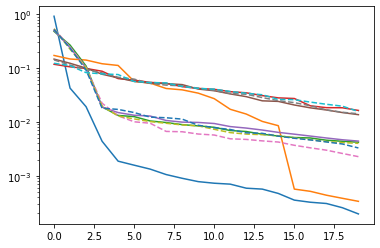

body order:  2


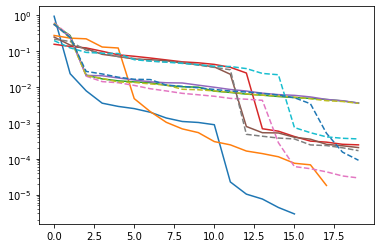

body order:  3


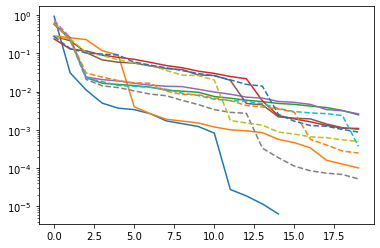

body order:  4


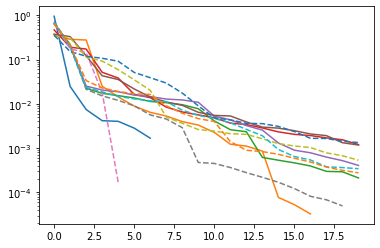

In [79]:
for nu in range(len(c_trans.blocks_)):
    print("body order: ", nu + 1)
    for i in range(6):
        if (c_trans.blocks_[nu].covariants_pca_ is not None):
            if (c_trans.blocks_[nu].covariants_pca_.even_pca_.pcas_[i] is not None):
                plt.plot(c_trans.blocks_[nu].covariants_pca_.even_pca_.pcas_[i].importances_)
        
    
    for i in range(6):
        if (c_trans.blocks_[nu].covariants_pca_ is not None):
            if (c_trans.blocks_[nu].covariants_pca_.odd_pca_.pcas_[i] is not None):
                plt.plot(c_trans.blocks_[nu].covariants_pca_.odd_pca_.pcas_[i].importances_, '--')
    
    plt.yscale('log')
    plt.show()